In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
import nltk
import re
import string
nltk.download('punkt')
nltk.download('stopwords')

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<b>Load Dataset

In [2]:
# read excel into a DataFrame
data = pd.read_csv('data job posts.csv',parse_dates= ['date'])
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [3]:
data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [4]:
data.dtypes

jobpost             object
date                object
Title               object
Company             object
AnnouncementCode    object
Term                object
Eligibility         object
Audience            object
StartDate           object
Duration            object
Location            object
JobDescription      object
JobRequirment       object
RequiredQual        object
Salary              object
ApplicationP        object
OpeningDate         object
Deadline            object
Notes               object
AboutC              object
Attach              object
Year                 int64
Month                int64
IT                    bool
dtype: object

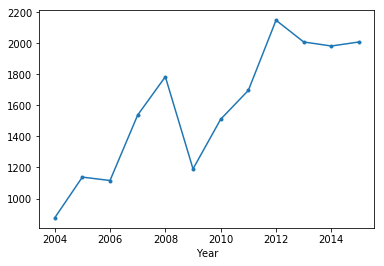

In [5]:
job_year=data.groupby(by=["Year"])['jobpost'].count()
job_year.plot(style='.-')

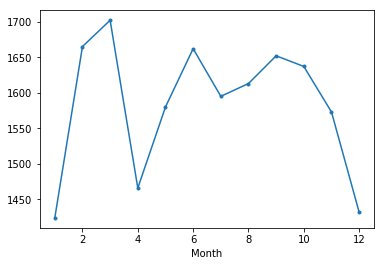

In [6]:
job_month=data.groupby(by=["Month"])['jobpost'].count()
job_month.plot(style='.-')

In [7]:
job_company=data.groupby(by=["Company"])['jobpost'].count().reset_index()
job_company.sort_values(by='jobpost', ascending=False).head(20)

,Company,jobpost
1125,ArmenTel CJSC,353
4458,World Vision Armenia,239
3063,Mentor Graphics Development Services CJSC,236
1556,Career Center NGO,229
3335,Orange Armenia,203
970,Ameriabank CJSC,196
1756,Converse Bank CJSC,161
3650,SAS Group LLC,150
4184,UNDP Armenia Office,132
1655,Central Bank of Armenia,126


<b>Data Cleaning Steps:-

<b>1)Create a dataframe with useful columns

In [8]:
data1=data[['jobpost','Title','JobRequirment','JobDescription','RequiredQual','AboutC','IT','Year']]
data1.head()

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,AboutC,IT,Year
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\nindividu...",NaN,False,2004
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,The International Research & Exchanges Board (...,False,2004
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\nn...,False,2004
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,- Identify gaps in knowledge and overseeing in...,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...",NaN,False,2004
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,- Rendering technical assistance to Database M...,NaN,- University degree; economical background is ...,NaN,True,2004


<b>2)Removing duplicate rows

In [9]:
print(data1.shape)
df = data1.drop_duplicates(['jobpost','Title'])
print(df.shape)
print("Removed {0} duplicates (based on jobpost + Title)".format(data1.shape[0]-df.shape[0]))

(19001, 8)
(18892, 8)
Removed 109 duplicates (based on jobpost + Title)


<b>3)Removing emails,newlines,single characters,web address,numbers

In [10]:
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub('\S*@\S*\s?', '', x))  # remove emails
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub('\s+', ' ', x))  # remove newlines
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub("\'", "", x))  # remove single quotes
re1 = '(www)'  # Word 
re2 = '(\\.)'  # Any Single Character 
re3 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 
rg = re.compile(re1 + re2 + re3, re.IGNORECASE | re.DOTALL)
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub(rg, "", x))
df.jobpost = df.jobpost.apply(lambda x: re.sub('(\\d+)', "", x))  # remove numbers

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

<b>Tokenisation

In [11]:
df['jobpost_token'] = df.jobpost.map(word_tokenize)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df.jobpost_token.head()

0    [AMERIA, Investment, Consulting, Company, JOB,...
1    [International, Research, &, Exchanges, Board,...
2    [Caucasus, Environmental, NGO, Network, (, CEN...
3    [Manoff, Group, JOB, TITLE, :, BCC, Specialist...
4    [Yerevan, Brandy, Company, JOB, TITLE, :, Soft...
Name: jobpost_token, dtype: object

In [13]:
df['jobpost_len'] = df.jobpost_token.apply(len)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.iloc[105]['Title']

'International Prize for R&D in Biomedicine and New Technologies'

Text(0.5,1,'Length of jobpost (for each of the rows), plotted')

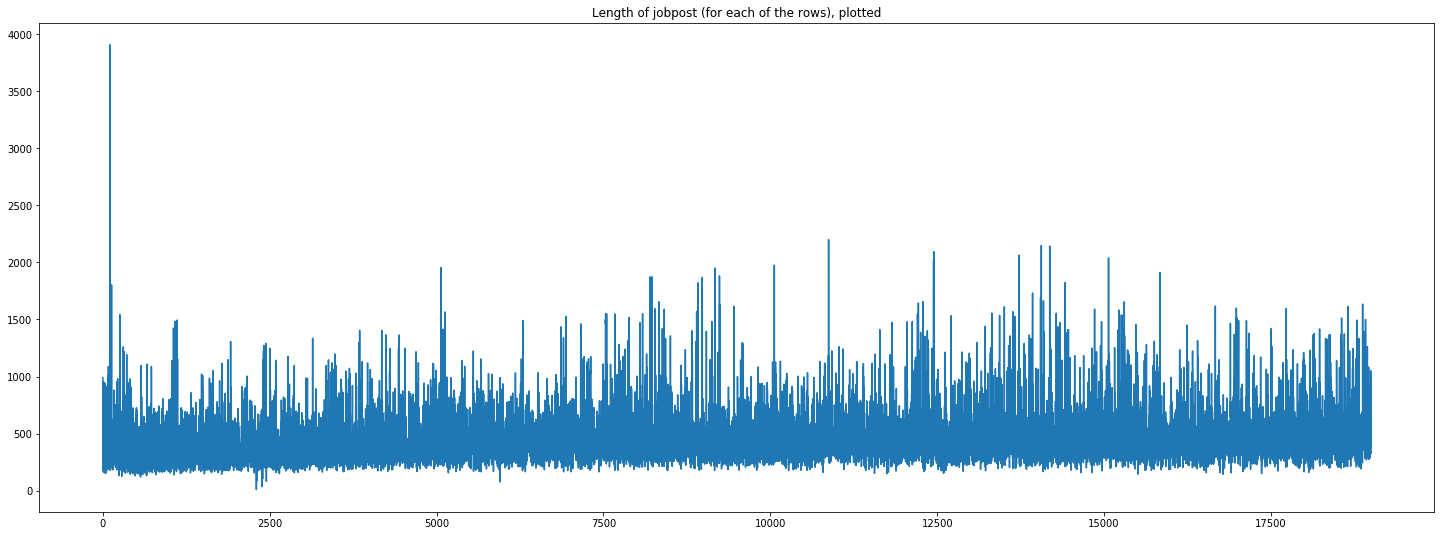

In [15]:

import matplotlib.pyplot as plt
plt.figure(figsize=(25, 9))
plt.plot(df.jobpost_len)
plt.title('Length of jobpost (for each of the rows), plotted')

<b>Lets try for one row then using for all rows

In [16]:
tokens = (df.iloc[0])['jobpost_token']

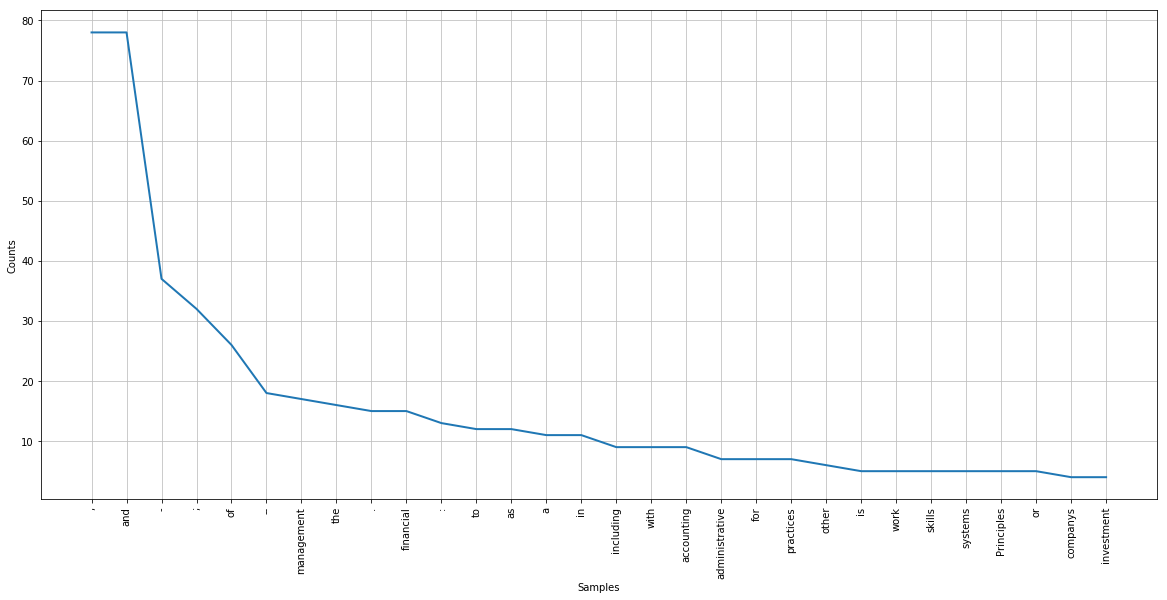

In [17]:
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens)  # case sensitive!
fd.plot(30)

<b>4)Removal of Punctuations & convert all to lower case

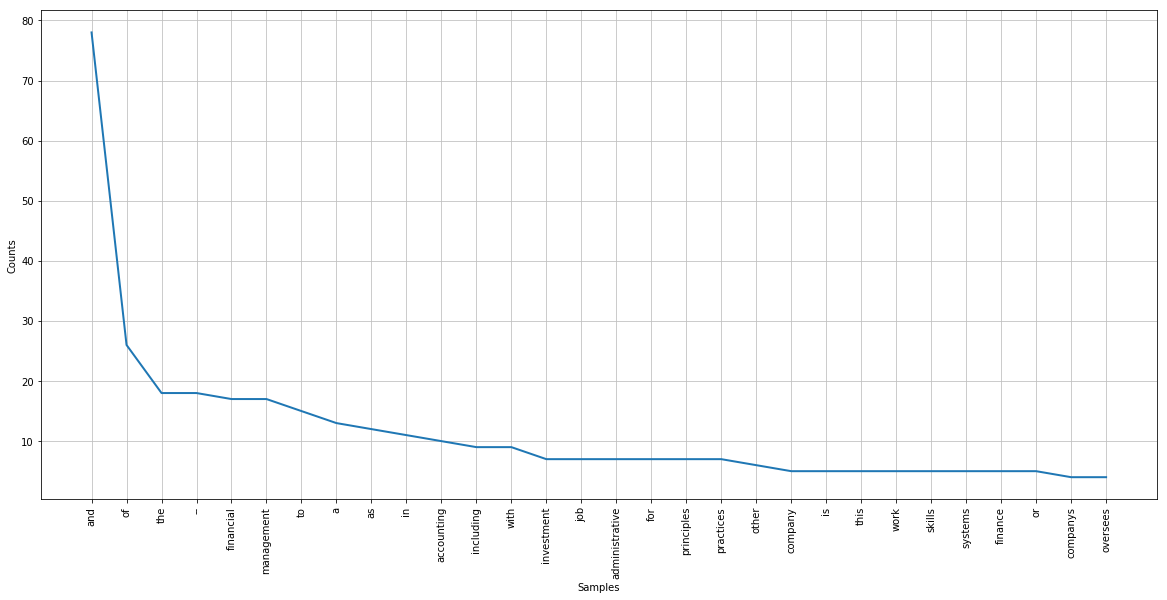

In [18]:
tokens_punc = [t for t in tokens if t not in string.punctuation]
tokens_punc = [t.lower() for t in tokens_punc]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens_punc) 
fd.plot(30)

<b>5)Removing Stopwords as Tokenisation is done prior

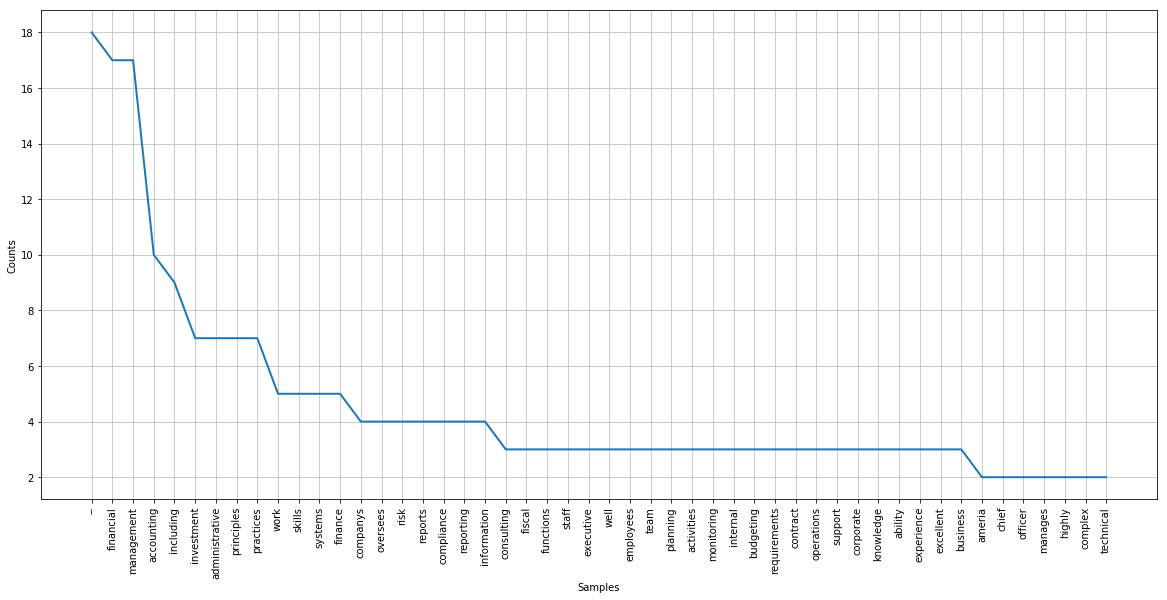

In [19]:
#Top 50 words without stopwords
stop = stopwords.words('english')
stop.extend(['armenian','armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application', 'procedures',
                 'deadline', 'required', 'qualifications', 'renumeration', 'salary', 'date', 'company','llc'])
tokens_stop = [t for t in tokens_punc if t not in stop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens_stop)
fd.plot(50)

<b>6)Lemmatisation

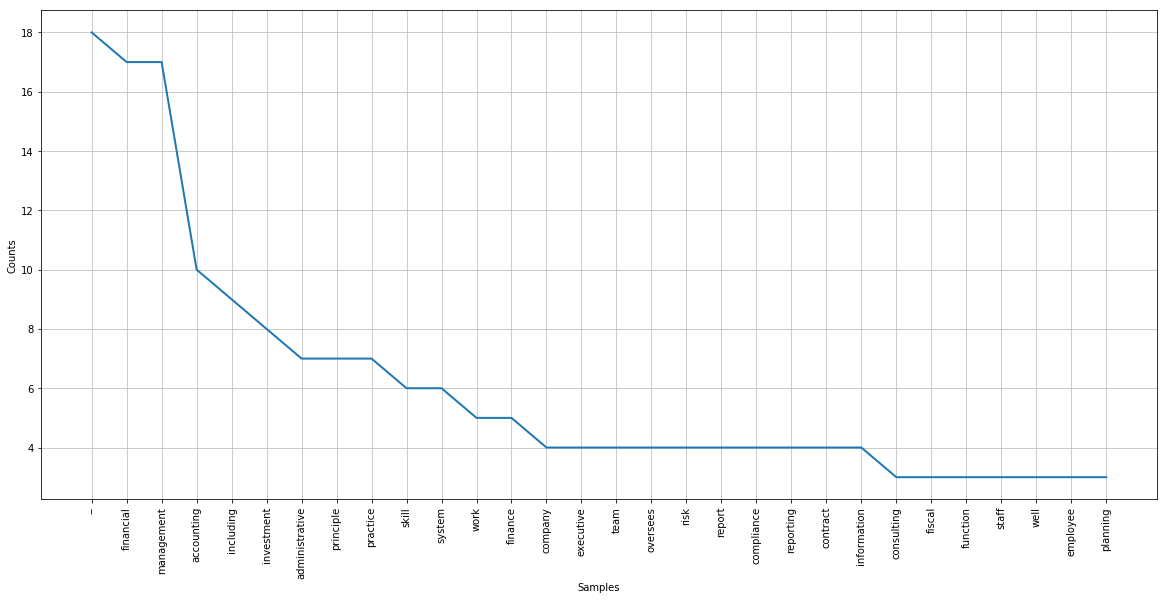

In [20]:
#Top 30 words after Lemmatisation
lem = nltk.WordNetLemmatizer()
tokens_lem = [lem.lemmatize(t) for t in tokens_stop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens_lem)  
fd.plot(30)

In [21]:
tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
text_clean = " ".join(tokens_clean)

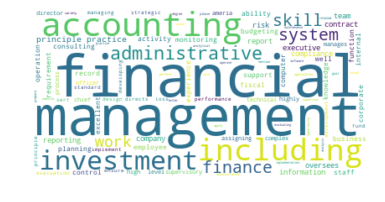

In [22]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

wc = WordCloud(background_color="white").generate(text_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b>Create a Preprocessing Function(Applying all above functions to all the rows) for All Rows

In [23]:
def preprocess(tokens):
    tokens_punc = [t for t in tokens if t not in string.punctuation]
    tokens_punc = [t.lower() for t in tokens_punc]
    lem = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    stop.extend(['armenian','armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application', 'procedures',
                 'deadline', 'required', 'qualifications', 'renumeration', 'salary', 'date', 'company'])
    tokens_stop = [t for t in tokens_punc if t not in stop]
    tokens_lem = [lem.lemmatize(t) for t in tokens_stop]
    tokens_clean = [t for t in tokens_lem if len(t) >= 3]  
    return tokens_clean

def plotWC(tokens):
    text_clean = " ".join(tokens)
    print(text_clean)
    wc = WordCloud(background_color="white").generate(text_clean)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))
    fd = nltk.FreqDist(tokens)  
    fd.plot(50)

In [24]:
tokens_clean = preprocess((df.iloc[4])['jobpost_token']) # we know this is a software job
print(tokens_clean)

['yerevan', 'brandy', 'software', 'developer', 'yerevan', 'rendering', 'technical', 'assistance', 'database', 'management', 'system', 'realization', 'sql', 'server', 'maintenance', 'activity', 'back-up', 'replication', 'participation', 'designing', 'software', 'development', 'project', 'university', 'degree', 'economical', 'background', 'plus', 'excellent', 'knowledge', 'window', 'server', 'networking', 'tcp/', 'technology', 'sql', 'server', 'visual', 'basic', 'least', 'year', 'experience', 'database', 'software', 'development', 'good', 'knowledge', 'english', 'remuneration', 'commensurate', 'norm', 'accepted', 'successful', 'candidate', 'submit', 'relevant', 'recommendation', 'letter', 'previous', 'employer', 'copy', '-ies', 'diploma', 'relevant', 'certificate', 'available', 'color', 'photo', 'either', 'isakov', 'avenue', 'yerevan', 'send', 'following', 'fax', 'e-mail', 'human', 'resource', 'department', 'armine', 'bibilyan', 'please', 'clearly', 'mention', 'letter', 'learned', 'oppor

<b>Plotting Word cloud for the cleaned data

yerevan brandy software developer yerevan rendering technical assistance database management system realization sql server maintenance activity back-up replication participation designing software development project university degree economical background plus excellent knowledge window server networking tcp/ technology sql server visual basic least year experience database software development good knowledge english remuneration commensurate norm accepted successful candidate submit relevant recommendation letter previous employer copy -ies diploma relevant certificate available color photo either isakov avenue yerevan send following fax e-mail human resource department armine bibilyan please clearly mention letter learned opportunity career center mention url website .am thanks january place free posting career related opportunity organization careercenter.am website e-mail


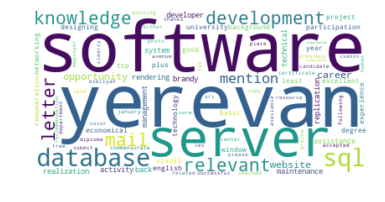

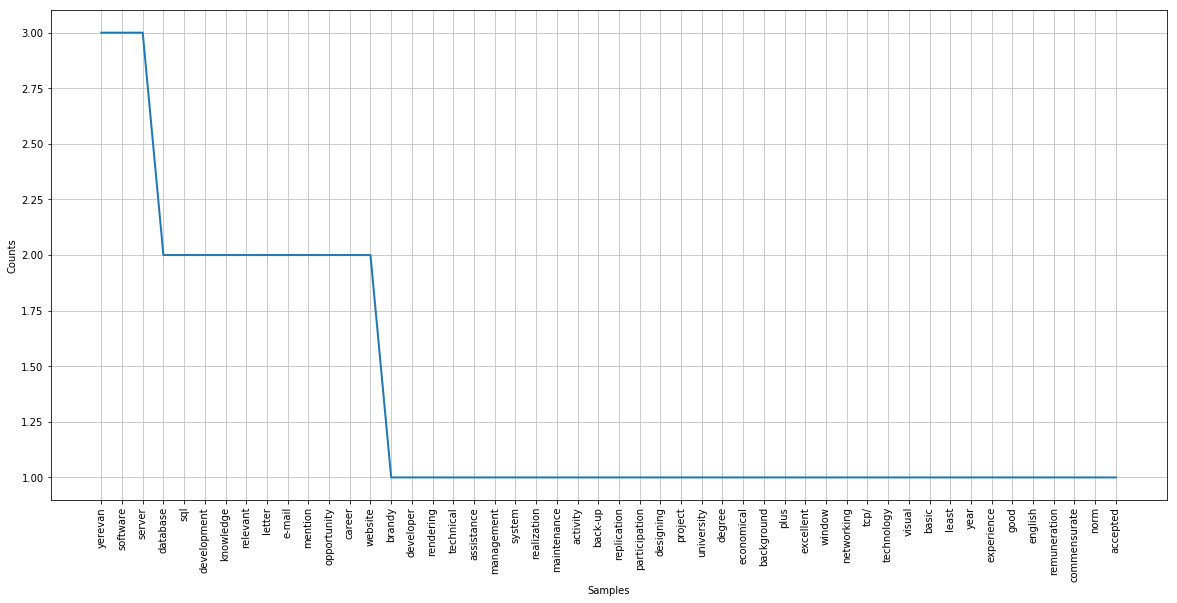

In [25]:
plotWC(tokens_clean)